# Laboratorio 2

Referencias utilizadas: Pauta Actividad 4

# Familirización con los datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

In [2]:
df_master = pd.read_csv("train.csv")
display(df_master.head())
display(df_master.describe())

C:\Users\Juaco\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


A partir de lo anterior se puede notar que:
1. Las variables Date y StateHoliday no aparecen en el *describe()*, esto se debe a que no son variables numéricas.
4. El 83% de las ventas se realizan con la tienda abierta, y el 38.1% con promociones.
5. El 17.9% de las ventas se realizan en feriados escolares.

Los estadísticos asociados a las variables Store y DayOfWeek no tienen mayor interpretación, dado que son categóricas.

La lógica indica que StateHoliday debiera ser una variable binaria o categórica. Analicemos los tipos de datos de cada columna.

In [3]:
df_master.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

Efectivamente StateHoliday no es una variable binaria como dice la lógica. A continuación se muestran los valores que toman las distintas columnas y la cantidad de apariciones

In [4]:
for columna in df_master.columns:
    print("\n\nColumn name: ",columna,"\nValue\t# Registers")
    display(df_master[columna].value_counts())



Column name:  Store 
Value	# Registers


233     942
836     942
308     942
309     942
821     942
       ... 
778     758
677     758
952     758
1065    758
512     758
Name: Store, Length: 1115, dtype: int64



Column name:  DayOfWeek 
Value	# Registers


4    145845
5    145845
3    145665
2    145664
1    144730
6    144730
7    144730
Name: DayOfWeek, dtype: int64



Column name:  Date 
Value	# Registers


2015-04-03    1115
2014-02-28    1115
2013-04-01    1115
2013-02-17    1115
2014-02-08    1115
              ... 
2014-11-30     935
2014-10-24     935
2014-12-25     935
2014-12-24     935
2014-12-27     935
Name: Date, Length: 942, dtype: int64



Column name:  Sales 
Value	# Registers


0        172871
5674        215
5558        197
5483        196
6049        195
          ...  
17847         1
24317         1
25114         1
19154         1
21958         1
Name: Sales, Length: 21734, dtype: int64



Column name:  Customers 
Value	# Registers


0       172869
560       2414
576       2363
603       2337
571       2330
         ...  
4440         1
44           1
4142         1
4238         1
4472         1
Name: Customers, Length: 4086, dtype: int64



Column name:  Open 
Value	# Registers


1    844392
0    172817
Name: Open, dtype: int64



Column name:  Promo 
Value	# Registers


0    629129
1    388080
Name: Promo, dtype: int64



Column name:  StateHoliday 
Value	# Registers


0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64



Column name:  SchoolHoliday 
Value	# Registers


0    835488
1    181721
Name: SchoolHoliday, dtype: int64

A partir de lo anterior, se puede concluir que:
1. La mayoría de las ventas ocurren cuando la tienda está abierta.
2. Un gran porcentaje de ventas se hacen durante promociones
3. La variable StateHoliday tiene un comportamiento binario, pero está representada como un objeto.
4. La variable StateHoliday posee dos interpretaciones del valor 0, una de tipo *int* y la otra de tipo *string*.

En base a esto se plantea el siguiente resumen:

| Variable      |	Tipo          | Descripción |
| :-:           | :-:           | :-:         | 
| Store         |    Categórica |  Identificador de la tienda       |
| DayOfWeek     |    Categórica |  Identificador del día de semana       |
| Date          |    Fecha      |  Fecha de la venta       |
| Sales         |    Entera     |  Ventas       |
| Customers     |    Entera     |  Clientes       |
| Open          |    Binaria    |  1 si la tienda estaba abierta, 0 si no       |
| Promo         |    Binaria    |  1 si habia promoción, 0 si no       |
| StateHoliday  |    Categórica    |  a, b o c si era feriado estatal, 0 si no       |
| SchoolHoliday |    Binaria    |  1 si era feriado escolar, 0 si no       |

In [5]:
df_master["StateHoliday"] = df_master["StateHoliday"].replace([0], "0")
print("\n\nColumn name: ","StateHoliday","\nValue\t# Registers")
display(df_master["StateHoliday"].value_counts())



Column name:  StateHoliday 
Value	# Registers


0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

# Datos faltantes

In [6]:
print("Datos faltantes por columna:")
display(df_master.shape[0] - df_master[~df_master["Store"].isna()].count())

Datos faltantes por columna:


Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

No tenemos datos faltantes. Las tiendas y sus registros estan ordenados por par `(Date DESC, Store ASC)`.

# Depuración

## Formato de columnas

In [7]:
transform = {"0": 0, "a": 1, "b": 2, "c": 3}
df_master["StateHoliday"] = df_master["StateHoliday"].map(lambda x: transform[x], na_action="ignore")
df_master["SchoolHoliday"] = df_master["SchoolHoliday"].replace(["0"], 0)
df_master["SchoolHoliday"] = df_master["SchoolHoliday"].replace(["1"], 1)

## Análisis de outliers

No tiene sentido analizar *outliers* en las siguientes columnas:
1. Store (debido a que es un ID)
2. DayOfWeek (días de la semana se mueven de 1 a 7)
3. Open, Promo, SchoolHoliday (son binarias)
4. StateHoliday (es categórica)

Por lo tanto, solo quedan 2 variables (Sales y Customers).

Cantidad de registros sin ventas:  172869


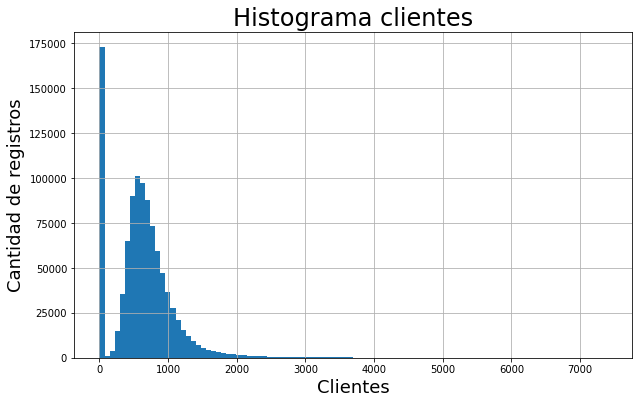

In [8]:
df_master["Customers"].hist(bins=100,figsize=(10,6))
plt.title("Histograma clientes",fontsize = 24)
plt.xlabel("Clientes",fontsize = 18)
plt.ylabel("Cantidad de registros",fontsize = 18)
print("Cantidad de registros sin ventas: ", df_master.value_counts("Customers", 0)[0])

<AxesSubplot:>

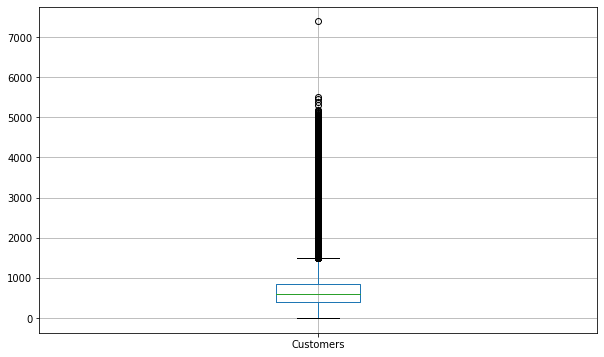

In [9]:
df_master.boxplot(column="Customers",figsize=(10,6))

Veamos su relación respecto a las ventas

Text(0, 0.5, 'Frecuencia')

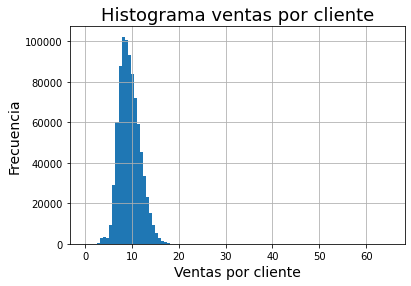

In [10]:
pd.DataFrame(df_master["Sales"] / df_master["Customers"]).hist(bins=100)
plt.title("Histograma ventas por cliente",fontsize = 18)
plt.xlabel("Ventas por cliente",fontsize = 14)
plt.ylabel("Frecuencia",fontsize = 14)

Text(0, 0.5, 'Ventas por cliente')

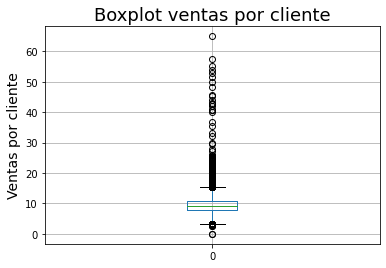

In [11]:
# ventas por cliente
pd.DataFrame(df_master["Sales"] / df_master["Customers"]).boxplot()
plt.title("Boxplot ventas por cliente",fontsize = 18)
plt.ylabel("Ventas por cliente",fontsize = 14)

Para corregir este comportamiento, apliquemos logaritmo sobre esta columna

In [12]:
df_master["Customers_log"] = df_master.apply(lambda row: 0 if row["Customers"] == 0 else np.log(row["Customers"]),axis=1)
df_master["Sales_log"] = df_master.apply(lambda row: 0 if row["Sales"] == 0 else np.log(row["Sales"]),axis=1)
# Se excluyen los ceros porque se indefine el logaritmo

In [13]:
df_master.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Customers_log,Sales_log
0,1,5,2015-07-31,5263,555,1,1,0,1,6.318968,8.568456
1,2,5,2015-07-31,6064,625,1,1,0,1,6.437752,8.710125
2,3,5,2015-07-31,8314,821,1,1,0,1,6.710523,9.025696
3,4,5,2015-07-31,13995,1498,1,1,0,1,7.311886,9.546455
4,5,5,2015-07-31,4822,559,1,1,0,1,6.326149,8.480944


# Misión 1: entrenamiento de modelos

Mis tres regresores son:
- Lineal
- SVM
- Red neuronal

## Preparando el entorno

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

from sklearn import metrics

Categorizar los valores de las columnas categóricas.

In [15]:
label_encoder = LabelEncoder()
for col in ["Store", "DayOfWeek", "Date", "Open", "Promo", "StateHoliday", "SchoolHoliday"]:
    df_master[col] = label_encoder.fit_transform(df_master[col])

In [16]:
df_master.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Customers_log,Sales_log
0,0,4,941,5263,555,1,1,0,1,6.318968,8.568456
1,1,4,941,6064,625,1,1,0,1,6.437752,8.710125
2,2,4,941,8314,821,1,1,0,1,6.710523,9.025696
3,3,4,941,13995,1498,1,1,0,1,7.311886,9.546455
4,4,4,941,4822,559,1,1,0,1,6.326149,8.480944


Normalizamos los valores de las columnas enteras (sin considerar al *target*, que en este caso es *Sales_log*).

Para normalizar la variable *customers* se requiere separar en train y test. Normalizar en base a todo el *df* no es correcto, porque los datos de test son desconocidos al momento de entrenar.

In [17]:
def escalar(train, test, col):
    scaler = StandardScaler()
    train[col] = scaler.fit_transform(train[col])  # la escala se ajusta sólo para train
    test[col] = scaler.transform(test[col])  # y luego se aplica para test, que es desconocido
    return train, test

In [18]:
cut_33p = df_master.shape[0] // 3 # Para separar en entrenamiento y test

df = df_master.copy()  # copiamos el data frame para no seguir cambiando el original

df_test = df.loc[:cut_33p].copy() # tercio más reciente para test (esto es válido solo porque están ordenados)
df_train = df.loc[(cut_33p+1):].copy()

col = ["Customers_log"] # La feature a normalizar
df_train, df_test = escalar(df_train, df_test, col)

In [19]:
display(df_test.shape)
display(df_train.shape)

(339070, 11)

(678139, 11)

Definimos las features y el target

In [20]:
features = ["Store", "DayOfWeek", "Date", "Customers_log", "Open", "Promo", "StateHoliday", "SchoolHoliday"]
target = "Sales_log"

In [21]:
def train_and_test_model(model, train, test, *args, **kwargs):
    d = {}
    d["reg"] = model(*args, **kwargs)
    d["reg"].fit(train[features], train[target])
    d["predictions"] = d["reg"].predict(test[features])
    d["selfpredict"] = d["reg"].predict(train[features])
    d["mse"] = metrics.mean_squared_error(test[target], d["predictions"])
    print("El error cuadrático medio es:", d["mse"])
    return d

### Regresión lineal

In [22]:
lineal = train_and_test_model(LinearRegression, df_train, df_test)
# CV
parameters_l = {"fit_intercept": [True, False], "normalize": [True, False]}
lineal_cv = train_and_test_model(GridSearchCV, df_train, df_test, LinearRegression(), parameters_l)

El error cuadrático medio es: 0.03475944674500796
El error cuadrático medio es: 0.03475944674492473



### Red neuronal (dura 2000 segundos o más)

In [23]:
mpl = train_and_test_model(MLPRegressor, df_train, df_test, max_iter=300)
# CV
parameters_mpl = {"max_iter": [300, 350, 400]}
mpl_cv = train_and_test_model(GridSearchCV, df_train, df_test, MLPRegressor(), parameters_mpl)

El error cuadrático medio es: 0.04784304066128044
El error cuadrático medio es: 0.039425584441520854


### Árbol de decisión (dura 200 segundos o más)

In [24]:
tree = train_and_test_model(DecisionTreeRegressor, df_train, df_test)
# CV
parameters_dtr = {"criterion": ["mse", "friedman_mse", "poisson"]}
mpl_cv = train_and_test_model(GridSearchCV, df_train, df_test, DecisionTreeRegressor(), parameters_dtr)

El error cuadrático medio es: 0.021672391427609624
El error cuadrático medio es: 0.02181156724145228


# Resumen

Regresor|MSE|CV
-|-|-
Lineal|0,035|0,035
Red neuronal|0,048|0,039
Árbol de decisión|0,022|0,022


## Notas
* Los valores de los MSE pueden variar al ejecutar nuevamente ya que hay aleatoriedad en la red neuronal y en el árbol de decisión, pero debieran ser similares.
* No se encontró una variación en la version con *cross-over* de la regresion lineal dado que los parametros de este no permiten una variación en el entrenamiento del modelo.
* El modelo de redes neuronales probo tardar mucho al probar múltiples variaciones de parametros.
* Se utilizo 300 iteraciones como caso base para el modelo de redes neuronales ya que con menos iteraciones no alcanzaba a converger a una solución en la mayoria de los casos.

El modelo que mejor ajusta es el árbol de decisión. Además, en este caso el *cross-validation* utilizado genera diferencias marginales, excepto por el modelo de redes neuronales que tuvo una mejora perceptible, por lo que parece que la configuración por *default* de los modelos es óptima para esta base de datos.

# Misión 2

In [25]:
df_store = pd.read_csv("store.csv")
display(df_store.head())
display(df_store.describe())

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [26]:
df_store.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [27]:
for columna in df_store.columns:
    print("\n\nColumn name: ",columna,"\nValue\t# Registers")
    display(df_store[columna].value_counts())



Column name:  Store 
Value	# Registers


1       1
742     1
748     1
747     1
746     1
       ..
378     1
379     1
380     1
381     1
1115    1
Name: Store, Length: 1115, dtype: int64



Column name:  StoreType 
Value	# Registers


a    602
d    348
c    148
b     17
Name: StoreType, dtype: int64



Column name:  Assortment 
Value	# Registers


a    593
c    513
b      9
Name: Assortment, dtype: int64



Column name:  CompetitionDistance 
Value	# Registers


250.0      12
1200.0      9
50.0        8
190.0       8
350.0       8
           ..
470.0       1
3870.0      1
5140.0      1
11900.0     1
36410.0     1
Name: CompetitionDistance, Length: 654, dtype: int64



Column name:  CompetitionOpenSinceMonth 
Value	# Registers


9.0     125
4.0      94
11.0     92
3.0      70
7.0      67
12.0     64
10.0     61
6.0      50
5.0      44
2.0      41
8.0      39
1.0      14
Name: CompetitionOpenSinceMonth, dtype: int64



Column name:  CompetitionOpenSinceYear 
Value	# Registers


2013.0    83
2012.0    82
2014.0    70
2005.0    62
2010.0    55
2011.0    54
2009.0    54
2008.0    54
2007.0    48
2006.0    47
2015.0    38
2002.0    27
2004.0    22
2003.0    19
2001.0    16
2000.0    10
1999.0     8
1990.0     5
1994.0     2
1995.0     2
1900.0     1
1961.0     1
1998.0     1
Name: CompetitionOpenSinceYear, dtype: int64



Column name:  Promo2 
Value	# Registers


1    571
0    544
Name: Promo2, dtype: int64



Column name:  Promo2SinceWeek 
Value	# Registers


14.0    81
40.0    77
31.0    44
10.0    42
5.0     39
37.0    35
1.0     35
45.0    34
13.0    34
22.0    33
18.0    29
35.0    25
9.0     14
27.0    11
36.0    10
48.0     9
39.0     6
23.0     5
44.0     3
26.0     1
50.0     1
6.0      1
28.0     1
49.0     1
Name: Promo2SinceWeek, dtype: int64



Column name:  Promo2SinceYear 
Value	# Registers


2011.0    128
2013.0    120
2014.0     95
2012.0     81
2009.0     73
2010.0     64
2015.0     10
Name: Promo2SinceYear, dtype: int64



Column name:  PromoInterval 
Value	# Registers


Jan,Apr,Jul,Oct     335
Feb,May,Aug,Nov     130
Mar,Jun,Sept,Dec    106
Name: PromoInterval, dtype: int64

In [28]:
print("Datos faltantes por columna:")
display(df_store.shape[0] - df_store[~df_store["Store"].isna()].count())

Datos faltantes por columna:


Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [29]:
columns_na = ["CompetitionDistance", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Promo2SinceWeek", "Promo2SinceYear"]
for col in columns_na:
    df_store[col] = df_store[col].fillna(df_store[col].mean())
df_store["PromoInterval"] = df_store["PromoInterval"].fillna(df_store['PromoInterval'].value_counts().index[0])
display(df_store.shape[0] - df_store[~df_store["Store"].isna()].count())


Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [30]:
# Assortment, StoreType, PromoInterval
transform_type = {"a": 0, "b": 1, "c": 2, "d": 3}
transform_assortment = {"a": 0, "b": 1, "c": 2}
transform_interval = {"Jan,Apr,Jul,Oct": 0, "Feb,May,Aug,Nov": 1, "Mar,Jun,Sept,Dec": 2}
df_store["Assortment"] = df_store["Assortment"].map(lambda x: transform_assortment[x], na_action="ignore")
df_store["StoreType"] = df_store["StoreType"].map(lambda x: transform_type[x], na_action="ignore")
df_store["PromoInterval"] = df_store["PromoInterval"].map(lambda x: transform_interval[x], na_action="ignore")
df_store.dtypes

Store                          int64
StoreType                      int64
Assortment                     int64
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                  int64
dtype: object

In [31]:
# Features categoricas
for col in ["Store", "StoreType", "Assortment", "PromoInterval", "Promo2"]:
    df_store[col] = label_encoder.fit_transform(df_store[col])

In [32]:
df = df_master.copy().merge(df_store, on="Store", how="left")
display(df.head())
display(df.describe())

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Customers_log,Sales_log,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,0,4,941,5263,555,1,1,0,1,6.318968,8.568456,2,0,1270.0,9.0,2008.0,0,23.595447,2011.763573,0
1,1,4,941,6064,625,1,1,0,1,6.437752,8.710125,0,0,570.0,11.0,2007.0,1,13.000000,2010.000000,0
2,2,4,941,8314,821,1,1,0,1,6.710523,9.025696,0,0,14130.0,12.0,2006.0,1,14.000000,2011.000000,0
3,3,4,941,13995,1498,1,1,0,1,7.311886,9.546455,2,2,620.0,9.0,2009.0,0,23.595447,2011.763573,0
4,4,4,941,4822,559,1,1,0,1,6.326149,8.480944,0,0,29910.0,4.0,2015.0,0,23.595447,2011.763573,0


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Customers_log,Sales_log,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.574297e+02,2.998341e+00,4.650630e+02,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,4.516279e-02,1.786467e-01,5.423487e+00,7.269248e+00,1.207467e+00,9.351412e-01,5.430020e+03,7.223450e+00,2.008683e+03,5.005638e-01,2.343209e+01,2.011758e+03,3.082120e-01
std,3.219087e+02,1.997391e+00,2.744541e+02,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,2.836559e-01,3.830564e-01,2.486588e+00,3.311960e+00,1.365376e+00,9.938011e-01,7.705298e+03,2.652674e+00,4.949376e+00,4.999999e-01,9.974306e+00,1.176502e+00,6.362705e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000e+00,1.900000e+03,0.000000e+00,1.000000e+00,2.009000e+03,0.000000e+00
25%,2.790000e+02,1.000000e+00,2.280000e+02,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.003887e+00,8.223359e+00,0.000000e+00,0.000000e+00,7.100000e+02,6.000000e+00,2.008000e+03,0.000000e+00,2.200000e+01,2.011764e+03,0.000000e+00
50%,5.570000e+02,3.000000e+00,4.560000e+02,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.411818e+00,8.655911e+00,0.000000e+00,0.000000e+00,2.330000e+03,7.224704e+00,2.008669e+03,1.000000e+00,2.359545e+01,2.011764e+03,0.000000e+00
75%,8.370000e+02,5.000000e+00,7.100000e+02,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,6.729824e+00,8.969033e+00,3.000000e+00,2.000000e+00,6.880000e+03,9.000000e+00,2.011000e+03,1.000000e+00,2.359545e+01,2.012000e+03,0.000000e+00
max,1.114000e+03,6.000000e+00,9.410000e+02,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,8.907612e+00,1.063468e+01,3.000000e+00,2.000000e+00,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03,2.000000e+00


In [33]:
cut_33p = df.shape[0] // 3 # Para separar en entrenamiento y test

df_2 = df.copy()  # copiamos el data frame para no seguir cambiando el original

df_test = df_2.loc[:cut_33p].copy() # tercio más reciente para test (esto es válido solo porque están ordenados)
df_train = df_2.loc[(cut_33p+1):].copy()

col = ["Customers_log"] # La feature a normalizar
df_train, df_test = escalar(df_train, df_test, col)
col = ["CompetitionDistance"] # La feature a normalizar
df_train, df_test = escalar(df_train, df_test, col)

In [34]:
features = ["Store", "DayOfWeek", "Date", "Customers_log", "Open", "Promo", "StateHoliday", "SchoolHoliday", "StoreType","Assortment","CompetitionDistance","CompetitionOpenSinceMonth","CompetitionOpenSinceYear","Promo2","Promo2SinceWeek","Promo2SinceYear","PromoInterval"]
target = "Sales_log"

### Regresión lineal

In [35]:
lineal = train_and_test_model(LinearRegression, df_train, df_test)
# CV
parameters_l = {"fit_intercept": [True, False], "normalize": [True, False]}
lineal_cv = train_and_test_model(GridSearchCV, df_train, df_test, LinearRegression(), parameters_l)

El error cuadrático medio es: 0.02795285544012219
El error cuadrático medio es: 0.027952855440121396


### Red neuronal (dura 3000 segundos aprox.)

In [36]:
mpl = train_and_test_model(MLPRegressor, df_train, df_test, max_iter=300)
# CV
parameters_mpl = {"max_iter": [300, 350, 400]}
mpl_cv = train_and_test_model(GridSearchCV, df_train, df_test, MLPRegressor(), parameters_mpl)

El error cuadrático medio es: 0.177829223811953
El error cuadrático medio es: 0.02398242193532253


### Árbol de decisión (dura 400 segundos aprox.)

In [37]:
tree = train_and_test_model(DecisionTreeRegressor, df_train, df_test)
# CV
parameters_mpl = {"criterion": ["mse", "friedman_mse", "poisson"]}
tree_cv = train_and_test_model(GridSearchCV, df_train, df_test, DecisionTreeRegressor(), parameters_mpl)

El error cuadrático medio es: 0.0086910793083396
El error cuadrático medio es: 0.008669124270517675


# Resumen

Regresor|MSE|CV
-|-|-
Lineal|0,028|0,028
Red neuronal|0,178|0,024
Árbol de decisión|0,009|0,009


## Notas
* Los valores de los MSE pueden variar al ejecutar nuevamente ya que hay aleatoriedad en la red neuronal y en el árbol de decisión, pero debieran ser similares.
* No se encontro una variacion en la version con *cross-over* de la regresión lineal dado que los parametros de este no permiten una variación en el entrenamiento del modelo.
* El modelo de redes neuronales probo tardar mucho al probar multiples variaciones de parametros.
* Se utilizo 300 iteraciones como caso base para el modelo de redes neuronales ya que con menos iteraciones no alcanzaba a converger a una solucion en la mayoria de los casos.

El modelo que mejor ajusta es el árbol de decisián. Además, en este caso el *cross-validation* utlizado genera diferencias marginales, por lo que parece que la configuracián por *default* de los modelos es óptima para esta base de datos.

Claramente el modelo de arbol de decicison se vio mas beneficiado por la nueva informacion, el modelo de regresion lineal tambien se vio beneficiado en un menor grado.

El gran incremento de rendimiento en el modelo de árbol de decisión se puede deber a que la información agregada posee varias variables categóricas que son de gran aporte a este tipo de modelos.

# Misión 3

In [38]:
    from sklearn.decomposition import PCA

In [39]:
pca = PCA(n_components=2)
df_reduced = pd.DataFrame(pca.fit_transform(df.copy().loc[:, df.columns != "Sales_log"]), columns=["0", "1"])
df_reduced["Sales_log"] = df["Sales_log"]
display(df_reduced)

,0,1,Sales_log
0,-4151.763969,-571.800286,8.568456
1,-4862.579716,222.450497,8.710125
2,8665.383520,2665.381973,9.025696
3,-4921.592860,8201.240253,9.546455
4,24490.884437,-618.803745,8.480944
...,...,...,...
1017204,-3450.942544,-5857.208877,0.000000
1017205,-3470.941260,-5857.482290,0.000000
1017206,3908.268191,-5756.734857,0.000000
1017207,-4480.835488,-5871.269393,0.000000


In [40]:
cut_33p = df_reduced.shape[0] // 3 # Para separar en entrenamiento y test

df_reduced_2 = df_reduced.copy()  # copiamos el data frame para no seguir cambiando el original

df_test_pca = df_reduced_2.loc[:cut_33p].copy() # tercio más reciente para test (esto es válido solo porque están ordenados)
df_train_pca = df_reduced_2.loc[(cut_33p+1):].copy()
features = ["0", "1"]
target = "Sales_log"

### Regresión lineal

In [42]:
lineal_pca = train_and_test_model(LinearRegression, df_train_pca, df_test_pca)

El error cuadrático medio es: 4.694201384915021



### Red neuronal (dura 300 segundos aprox.)

In [43]:
mpl_pca = train_and_test_model(MLPRegressor, df_train_pca, df_test_pca, max_iter=300)

El error cuadrático medio es: 0.040105239537966735


### Árbol de decisión

In [44]:
tree_pca = train_and_test_model(DecisionTreeRegressor, df_train_pca, df_test_pca)

El error cuadrático medio es: 0.0027068264944538033


# Resumen

Regresor|MSE|PCA
-|-|-
Lineal|0,028|4,694
Red neuronal|0,178|0,040
Árbol de decisión|0,009|0,003


## Notas
* Los valores de los MSE pueden variar al ejecutar nuevamente ya que hay aleatoriedad en la red neuronal y en el árbol de decisión, pero debieran ser similares.
* Se utilizo 300 iteraciones como caso base para el modelo de redes neuronales ya que con menos iteraciones no alcanzaba a converger a una solucion en la mayoria de los casos.

El reducir la dimensionalidad de los datos a 2 *features* tenemos una pérdida de rendimiento de varios grados de magnitud en la regresión lineal y una mejora importante en tanto la red neuronal y como en el árbol de decisión.

In [58]:
def plot_var_and_predictions(model_returned, test, title, predictions="predictions", variable="Sales_log"):
    plt.plot(np.exp(test[variable]), np.exp(model_returned[predictions]), ".")
    plt.ylabel("Predictions")
    plt.xlabel(variable)
    plt.title(title)
    plt.show()

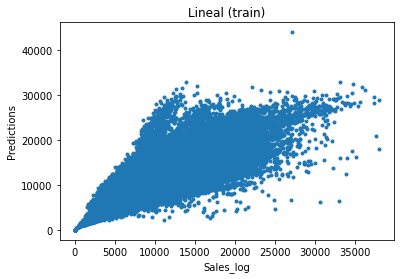

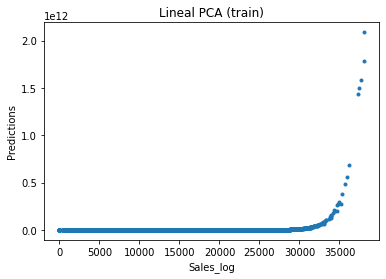

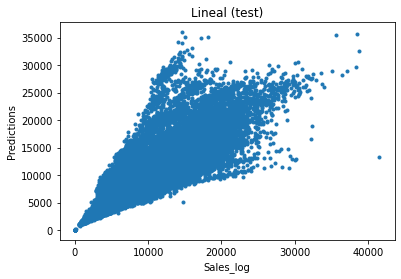

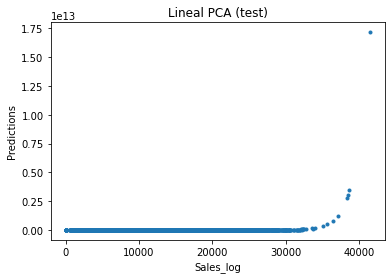

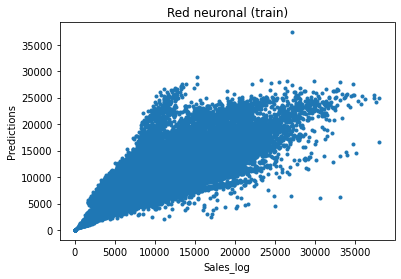

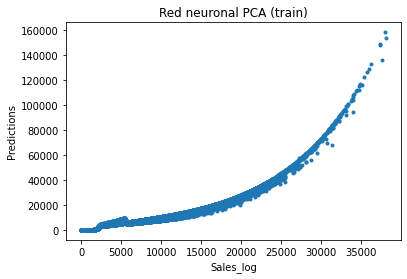

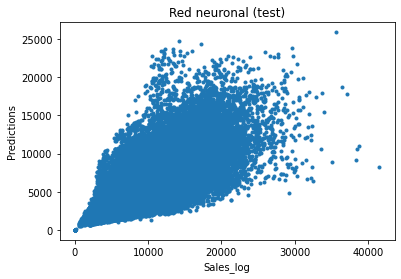

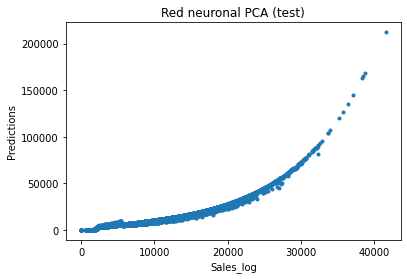

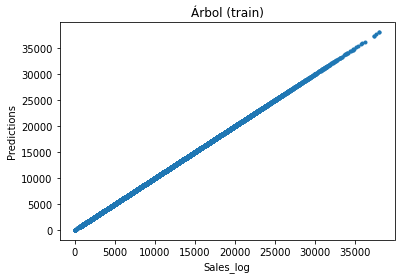

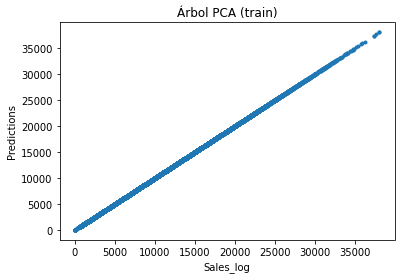

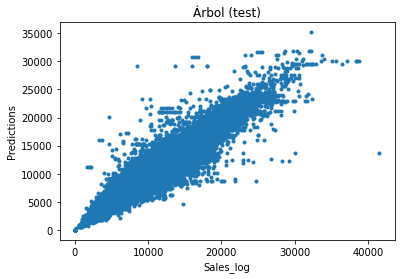

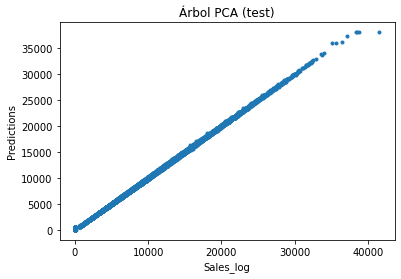

In [59]:
plot_var_and_predictions(lineal, df_train, "Lineal (train)", predictions="selfpredict")
plot_var_and_predictions(lineal_pca, df_train_pca, "Lineal PCA (train)", predictions="selfpredict")
plot_var_and_predictions(lineal, df_test, "Lineal (test)")
plot_var_and_predictions(lineal_pca, df_test_pca, "Lineal PCA (test)")

plot_var_and_predictions(mpl, df_train, "Red neuronal (train)", predictions="selfpredict")
plot_var_and_predictions(mpl_pca, df_train_pca, "Red neuronal PCA (train)", predictions="selfpredict")
plot_var_and_predictions(mpl, df_test, "Red neuronal (test)")
plot_var_and_predictions(mpl_pca, df_test_pca, "Red neuronal PCA (test)")

plot_var_and_predictions(tree, df_train, "Árbol (train)", predictions="selfpredict")
plot_var_and_predictions(tree_pca, df_train_pca, "Árbol PCA (train)", predictions="selfpredict")
plot_var_and_predictions(tree, df_test, "Árbol (test)")
plot_var_and_predictions(tree_pca, df_test_pca, "Árbol PCA (test)")

Gráficamente podemos confirmar los resultados obtenidos. Las predicciones del modelo de regresión lineal están bastante alejadas del modelo sin reducción de dimensionalidad, luego vemos como la red neuronal se acerca bastante más al set de validación y finalmente tenemos el modelo de árbol de decisión que logra una precisión muy alta.